In [31]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_build import load_data

In [28]:
#attempt to predict wins with teamcomp info
df = load_data(table="match_features")

In [29]:
df.head()

,puuid,championId,item0,item1,item2,item3,item4,item5,item6,kills,...,enemy_burst,enemy_engage,enemy_disengage,enemy_healing,enemy_Assassin,enemy_Fighter,enemy_Mage,enemy_Marksman,enemy_Support,enemy_Tank
0,nTDxqpCr7r2UtPosopEiwGdJErsChRyDeb5Fd8g_tigfWl...,51,3006,6671,2421,1038,3072,3031,3363,16,...,9.0,6.0,2.0,6.0,3.0,2.0,2.0,1.0,1.0,0.0
1,Vfwm1_N2gugTKkgOTt_nc6SNiHlLJt5DpWFvnV9g2ovysq...,83,3123,3133,3044,3047,1011,3077,3340,1,...,9.0,9.0,5.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0
2,z4eiZukJBUjqAjUOZOZt9cwvkRhBSQrL7alojbZNAFW0P1...,39,6673,3047,3153,3110,3091,0,3340,13,...,7.0,5.0,4.0,4.0,2.0,2.0,1.0,2.0,1.0,0.0
3,8rsE04JkhSIEMZClYF60cBN7b9GJENmbcLlqUjhT4YIMO0...,136,3040,6657,3116,3020,1058,0,3340,11,...,7.0,5.0,4.0,4.0,2.0,2.0,1.0,2.0,1.0,0.0
4,MQPuQO90ORtKwDMEz4HwPhzsA0CwityHbEx2YFFfpkTp__...,112,1056,6655,3089,3020,3135,1052,3363,10,...,8.0,8.0,4.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
championId,68375.0,167.276417,177.434626,1.0,55.000000,110.000000,203.0,897.0
item0,68375.0,3481.393199,1960.891484,0.0,2065.000000,3109.000000,3960.5,8020.0
item1,68375.0,3739.846874,1956.328220,0.0,3006.000000,3133.000000,6630.0,8020.0
item2,68375.0,3231.255985,1826.250887,0.0,2065.000000,3074.000000,3222.0,8020.0
item3,68375.0,3012.428797,1765.654453,0.0,2055.000000,3068.000000,3158.0,8020.0
item4,68375.0,2499.668212,1831.353445,0.0,1036.000000,3035.000000,3133.0,8020.0
item5,68375.0,1839.549397,1776.602625,0.0,0.000000,1055.000000,3082.0,8020.0
item6,68375.0,3357.834004,42.618336,0.0,3363.000000,3363.000000,3364.0,3513.0
kills,68375.0,5.572197,4.327953,0.0,2.000000,5.000000,8.0,44.0
kda,68375.0,4.000944,4.133586,0.0,1.428571,2.666667,5.0,46.0


In [49]:
#select feature cols of interest
features = df.iloc[:, 31:]
#win col
Y = df["win"]

In [51]:
def plot_feature_dist(df):
    fig, axs = plt.subplots(nrows=int(np.ceil(df.select_dtypes(include=np.number).shape[1] / 2)), 
                            ncols=3, figsize=(10, 35))

    # flatten the axes array and iterate over it and the columns simultaneously
    for ax, col in zip(axs.flatten(), df.select_dtypes(include=np.number).columns):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'Distribution of {col}')

    # delete any unused subplots
    for ax in axs.flatten()[len(df.select_dtypes(include=np.number).columns):]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

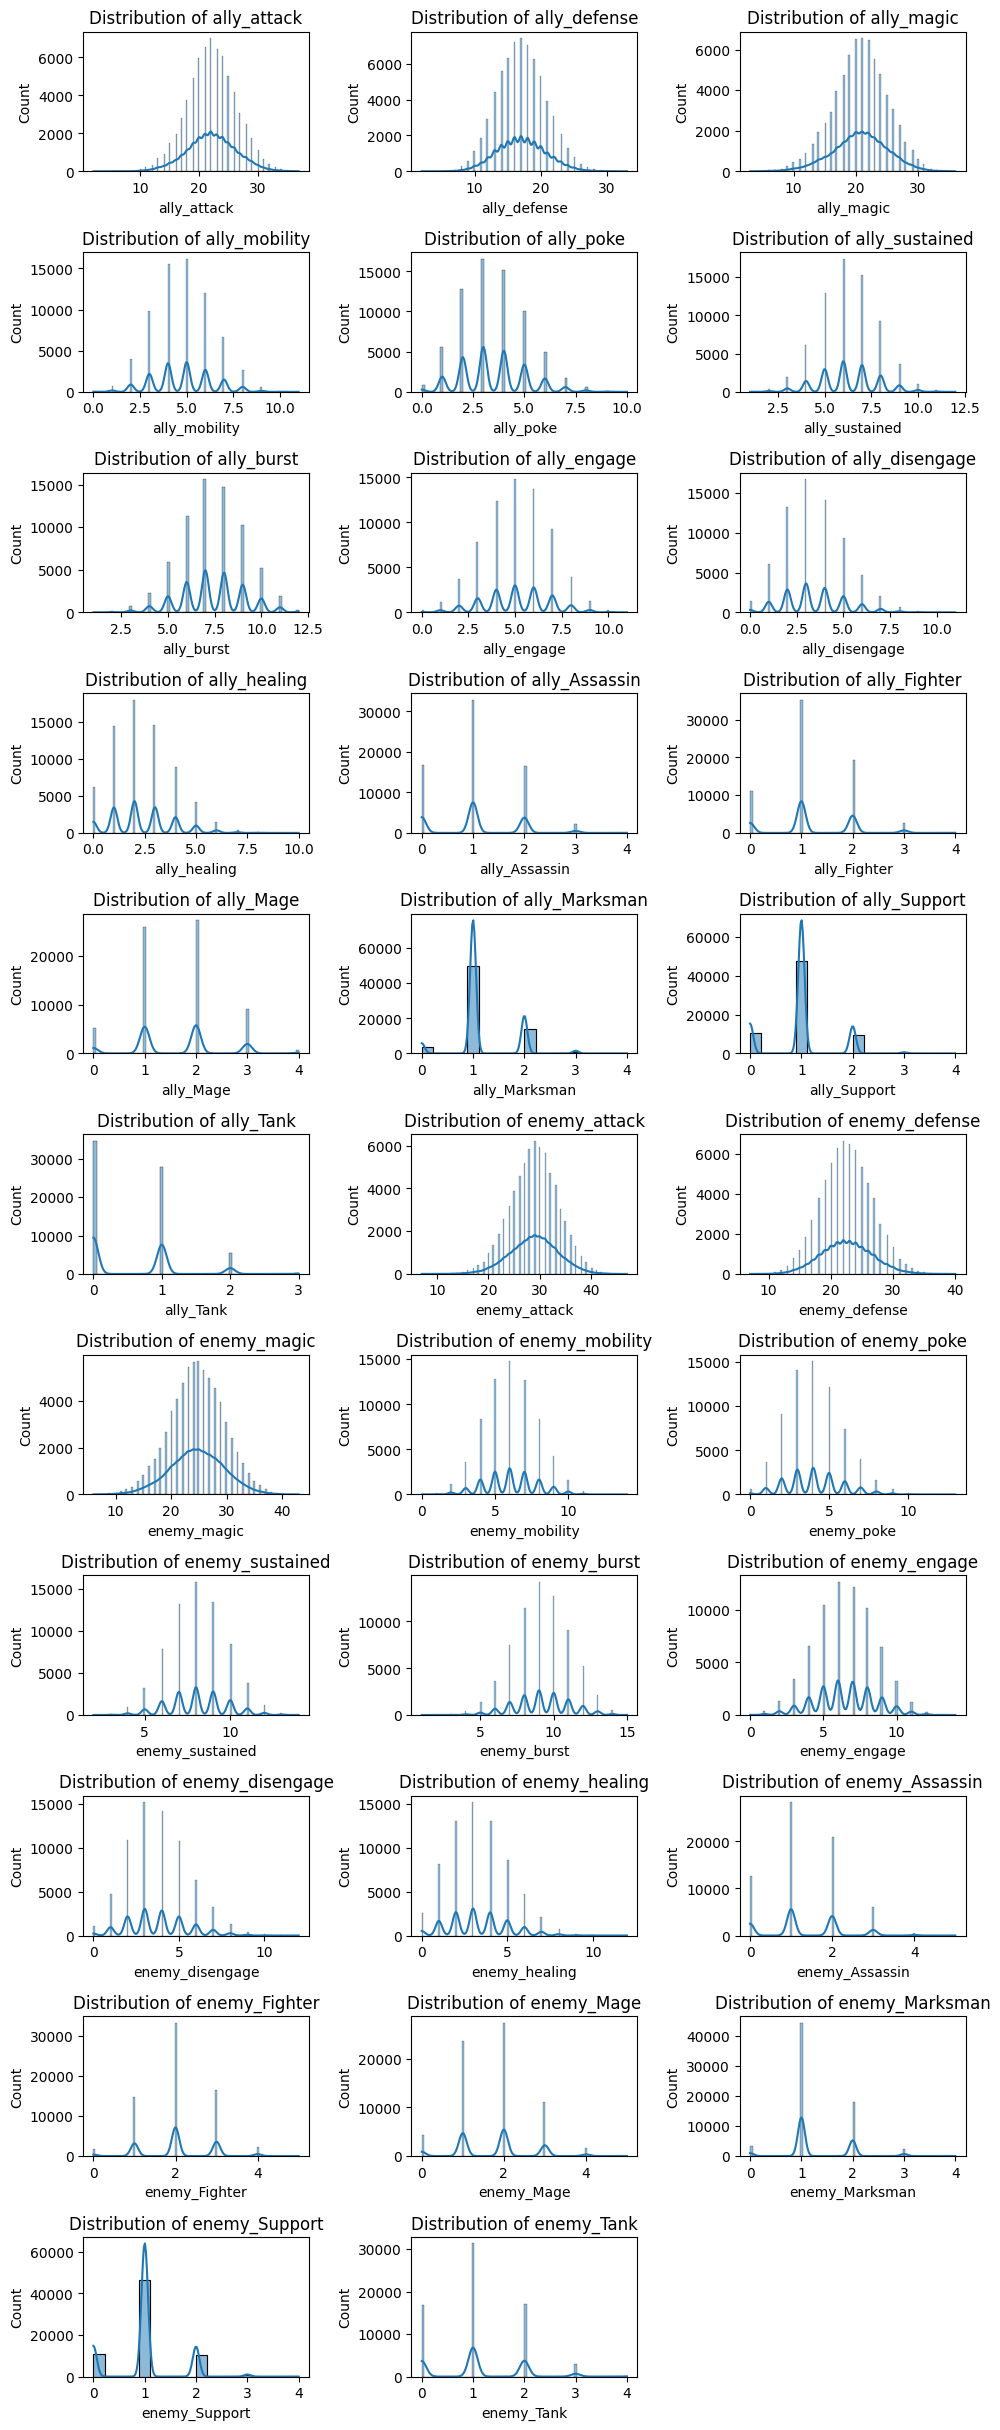

In [52]:
plot_feature_dist(features)

In [53]:
Y.value_counts()

win
1    36704
0    31671
Name: count, dtype: int64

In [57]:
#dataset is balanced, try out a basic model
#ML imports
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, log_loss, roc_curve



In [63]:
def build_classifier(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    classifier = LogisticRegression()

    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier),
    ])

    # Define the parameter grid for logistic regression
    param_grid = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    }

    # Setup the GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

    # Train the classifier
    grid_search.fit(X_train, y_train)

    # Print the best parameters
    print("Best Parameters:")
    print(grid_search.best_params_)

    # Predict the labels using the best model
    y_pred = grid_search.predict(X_test)

    # Predict probabilities using the best model
    y_proba = grid_search.predict_proba(X_test)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("ROC AUC Score:", roc_auc_score(y_test, y_proba[:,1]))

    print("Log Loss:", log_loss(y_test, y_proba))

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba[:,1]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return grid_search

Best Parameters:
{'classifier__C': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.09      0.15      9522
           1       0.54      0.92      0.68     10991

    accuracy                           0.53     20513
   macro avg       0.51      0.50      0.41     20513
weighted avg       0.51      0.53      0.43     20513

ROC AUC Score: 0.5239424473454068
Log Loss: 0.6898997550701569


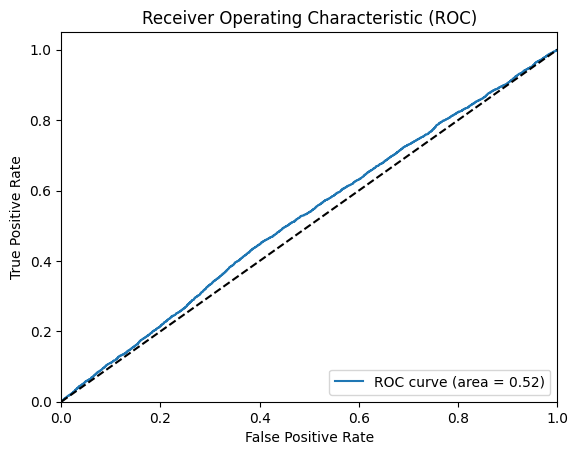

In [64]:
grid_search = build_classifier(X=features, y=Y)

In [65]:
grid_search.

array([0, 1])